# GCP Fundamentals

## Containers

**IaaS:** cloud-based services, pay-as-you-go for services such as storage, networking, and virtualization. (VM)

**PaaS:** hardware and software tools available over the internet. (App Engine)

**SaaS:** software that's available via a third-party over the internet.

**Kubernetes** can scale host, deploy new versions and can roll back versions.

**Containers** are create through Docker that allows us to replicate code, so that we can create different images and instances of our code.

## Kubernetes Engine and GKE

Kubernetes allow us to manage our application, oferring an API to control operations.
            Deploy clusteres (components or nodes)
            
node: A VM


### Kubernetes commands

In [ ]:
gcloud container clusters create k1 #create a clustered configured and ready to go call "k1"
kubectl autoscale nginx --min=10 --max = 15 --cpu=80 #min & max amount of ponds and criteria to scale ( cpu at 80%)
kubectl get pods services # shox our services public API adresse (for clients)
kubectl scale nginx --replicas #if you need more power
kubectl get pods -l "app=nginx" -o yaml #work on a declarative way (config file)

kubectl apply -f nginx-deployment.yaml # edit the deploymnt config and the use the apply command
kubectl get replicasets # view replicas and see theire updated state
kubectl get pods # watch the pods come online
kubectl get deplotments #check the deployment to see if the replicas are working fine
kubectl get services #confirms that the externam IP of the services is unaffected

#this technique allow us to create 5 replicas of our nginx pod running in gke with one server proxing the traffic to all 5 pods,
#allow to share the load

#to do Rolling Updates on a deployment with new versions, kubernetes create one by one version and the substituing old versions
#to avoid long down times

#_____________________________________________________________________________________________________________________


In [ ]:
#Create a kubernetes engine cluster, deploy a Balane service to it and perform and scale opperation
export MY_ZONE=us-central1-f #define enviroment variable with my prefer gcp zone

#Launch Kubernetes cluster in that zone with 2 nodes
gcloud container clusters create webfrontrnd --zone $My_Zone --num-nodes 2 

#Confirm the version
kubectl version

#create a kubernetes a kubernetes deployment of a single pod called ngingx 
kubectl run nginx --image=nginx:1.10.0

#confirm its running
kubectl get pods

#expose so that clients can access it 
kubectl expose deployment nginx --port 80 --type LoadBalancer

#view the new service by assigning and external IP adresse
kubectl get services

#scale up the deployment
kubectl sclape deploymnt nginx --replicas 3 #name the deployment and specify the number of replicas

#look ath the number of pods
kubectl get pods

#confirm the external IP adree reamined the same
kubectl get services

**Pod:** Virtual Ethernet with containers and different disks volumes, they communicate through a local port

**Nginx:** The goal behind NGINX was to create the fastest web server around, and maintaining that excellence is still a central goal of the project. NGINX consistently beats Apache and other servers in benchmarks measuring web server performance. 

**Service:** group set of pods together and provides an stable IP adresses. 

## Hybrid and Multi-Clod Computhing (Anthos) 

**Anthos:** Solution fir hybrid and multi-cloud systems and services management. 

            - Manage
            - Monitor systems and services
            - Migrating applications from VM's into cluster
            - Maintaining consistent policies across all clusters whether on-premises or in the cloud

## Applications in the Cloud

### APP Engine (PaaS)

Two App engine environements; Standar & Flexible

**Standar:** 
    -Simpler deployment and auto-scaling with a free usage quota, support only some programming languages, run in a sandbox.
    -Develop and test web applications locally -> Use SDK to deploy app Engine -> automatically scales your web applications -> can acess a variety of services using dedicated API's
    

**Flexible:**
    -Specify the containeres apps, no sandbox constraints, can acess App Engine resources 


In [ ]:
# You can list the active account name with this command:
gcloud auth list

# You can list the project ID with this command:
gcloud config list project

In [ ]:
#Initialize the App Engine 
gcloud app crete --project=DEVSHELL_PROJECT_ID

In [ ]:
#following command to download and update the packages list.
sudo apt-get update

#Set up a virtual environment in which you will run your application. Python virtual environments are used to isolate package installations from the system
sudo apt-get install virtualenv
virtualenv -p python3 venv

#Activate the virtual environment
source venv/bin/activate
pip install  -r requirements.txt

#run the app
python main.py

In [ ]:
# Deploy and run on App Engine
cd ~/python-docs-samples/appengine/standard_python3/hello_world #go to source directory
gcloud app deploy

#Launch the browser to view he app
gcloud app browse

## Developing, Deploying and Monitoring in the Cloud

**Cloud Source Repositories:** Featured a Git repository hosted on GCP on a private way.

**Cloud Functions:** Create a single-propose functions that respond to an event without server or runtime

**Stackdriver:** GCP tool to monitor, logging, debug, error reporting, traces, profiler

        monitoring: Platform, system and application metrics, Dashboards and alerts
        
        Logging: Platform, system and application *logs*, Log-based metrics
        
        Trace: Latency reporting and sampling
        
        Error Reporting: error notifications & dashboards
        
        Debugger: Debug applications
        
        Profiler: continuos profiling of CPU and memory consumption

In [ ]:
#Create a variable with my GCP project_id
echo $DEVSHELL_PROJECT_ID

#create a development manager template
nano mydeploy.yaml

In [ ]:
#Create a Deployment Manager deployment
export MY_ZONE=us-centrai1-a

#At the Cloud Shell prompt, download an editable Deployment Manager template:
gsutil cp gs://cloud-training/gcpfcoreinfra/mydeploy.yaml mydeploy.yaml

#In the Cloud Shell, use the sed command to replace the PROJECT_ID placeholder
#string with your Google Cloud Platform project ID using this command:

sed -i -e "s/PROJECT_ID/$DEVSHELL_PROJECT_ID/" mydeploy.yaml

#View the mydeploy.yaml file, with your modifications, with this command:
cat mydeploy.yaml

#Build a deployment from the template
gcloud deployment-manager deployments create my-first-depl --config mydeploy.yaml

In [ ]:
#Update a Deployment Manager deployment

#Launch the nano text editor to edit the mydeploy.yaml file
nano mydeploy.yaml

#Find the line that sets the value of the startup script, value: "apt-get update", and edit it so that it looks like this
      value: "apt-get update; apt-get install nginx-light -y"
        #Ctl + O ->save then Ctrl+ X -> exit

#Enter this command to cause Deployment Manager to update your deployment to install the new startup script   
gcloud deployment-manager deployments update my-first-depl --config mydeploy.yaml

In [ ]:
#View the Load on VM using Cloud Monitoring

#In the ssh session on my-vm, execute this command to create a CPU load:
dd if=/dev/urandom | gzip -9 >> /dev/null &

#Create a Moitoring workspace navigation > monitoring

#Run the commands shown on screen in the SSH window of your VM instance to install both the Monitoring and Logging agents.
curl -sSO https://dl.google.com/cloudagents/install-monitoring-agent.sh
sudo bash install-monitoring-agent.sh

curl -sSO https://dl.google.com/cloudagents/install-logging-agent.sh
sudo bash install-logging-agent.sh

#Terminate your workload generator. Return to your ssh session on my-vm and enter this command:
kill %1

## Google Cloud Big Data Platform

**Apache Hadoop:**

    -Fast, easy managed way to run Hadoop and Spark/Hive/Pig on GCP
    -Create clusters in 90s or less
    -Scale clusters up and down even when jobs are running

**Cloud Data Flow:** 

    -Unify programming model and a monitoring service
    -Build data Pipelines
    -ETL tool (Extract, transform, load)

**BigQuery:** 

    -Analytics warehouse
    -Run SQL queries, read and write data in BigQuery via Hadoop, data flow, spark, etc.
    

**Cloud Pub/Sub:** (Publishers/Subscribers)

    -Messaging service

**Cloud ML:**

    -Machine Learning Platform
    -Machine Learning APIs
 

**Cloud Vision API/ Cloud Natural Language API/ Cloud Translation API:**

    -Analyse Images
    -Natural language; break up text and extract specific information
    -Cloud Translation; Translate languages
    

## Recap

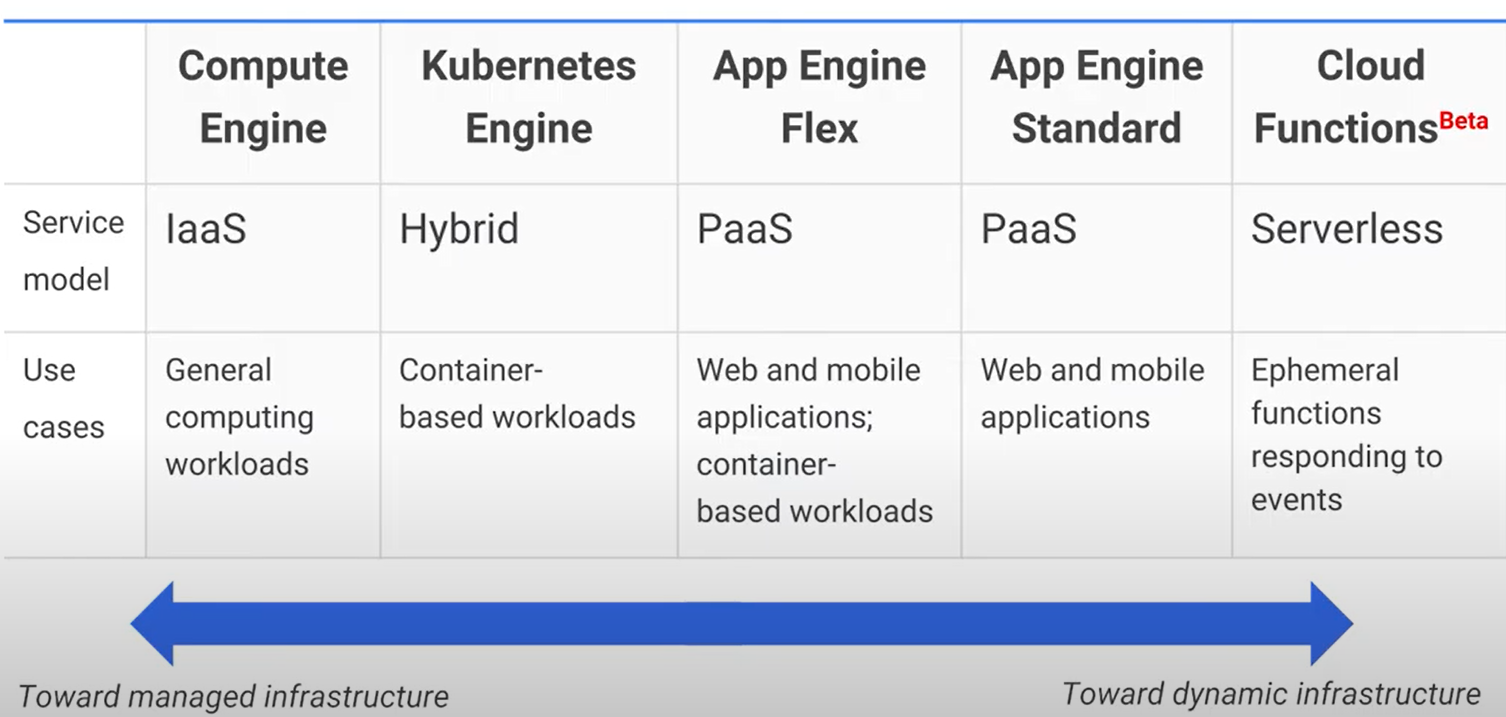


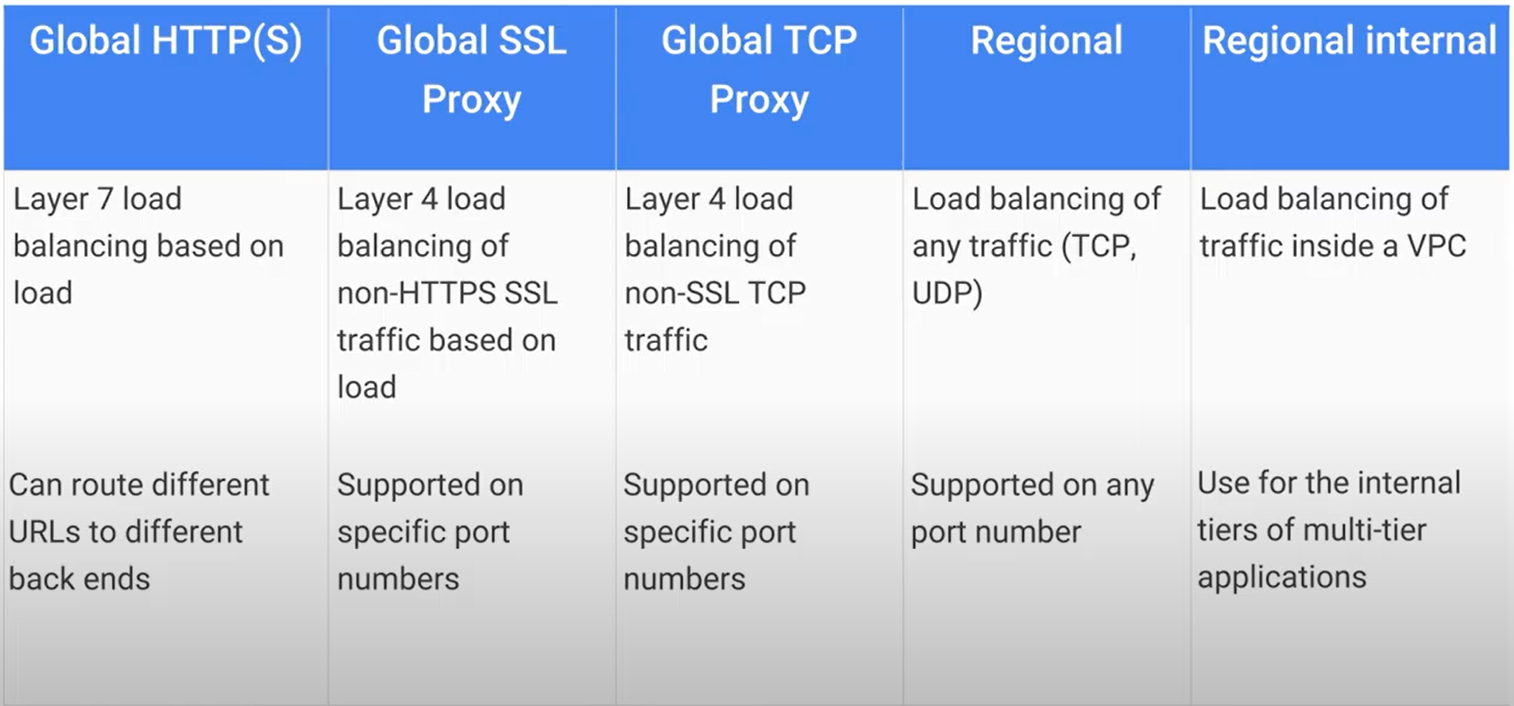

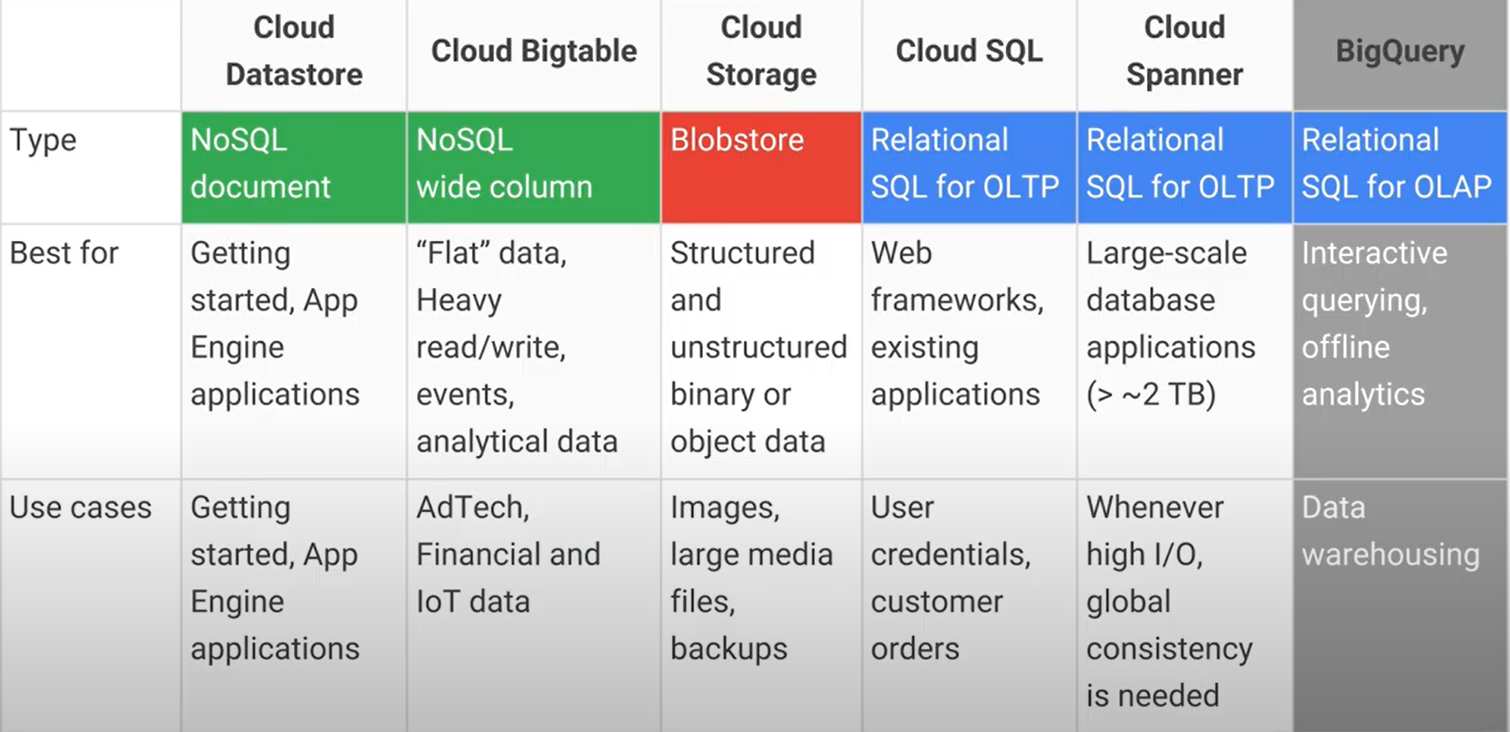